In [33]:
import tensorflow as tf
import numpy as np 
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from IPython.display import clear_output, Image, display, HTML
import pandas as pd 
from __future__ import print_function

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    #get n random index
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    ####
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)
###### Implement Data Preprocess here ######
dataset = fetch_california_housing(data_home='./')
M = dataset.data.shape[0]
# normalized data
dataset.data -= np.mean(dataset.data, axis=0)
dataset.data /= np.std(dataset.data, axis=0)
###### End Data Preprocess ######
dataset.target=dataset.target.reshape([M, 1])
print(dataset.target.shape)
###### Start TF session ######
learning_rate = 0.001
batch_size = 100

# Create the model
Y = tf.placeholder(tf.float32,[None,1],name = 'Y')
X = tf.placeholder(tf.float32, [None,8],name = 'X_in')

W = tf.Variable(tf.random_normal([8,1]),name = 'n_Weight' )
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis  = tf.add(tf.matmul(X, W), b)
loss = tf.reduce_sum(tf.square(hypothesis  - Y)) / (batch_size)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# Initialize the variables (i.e. assign their default value)

with tf.Session() as sess:
    # Run the initializer
    init = tf.global_variables_initializer() 
    sess.run(init)
    # Fit all training data

    batch_count = int(M/batch_size)
    for i in range(batch_count*10):
        Xtr, Ytr = next_batch(batch_size, dataset.data, dataset.target)
        _, loss_val, hypo = sess.run(
            [train_op, loss, hypothesis],
            feed_dict={X:Xtr,Y:Ytr})

    print("Done!\n")
    print("Running test...\n")

    t=0
    W_final = sess.run(W)
    b_final = sess.run(b)
    for pred_n in range(M):
        t = t+np.power(np.matmul(dataset.data[pred_n],W_final)+b_final-dataset.target[pred_n],2)
    print("loss =" + str(t/M))
    print("Ran " + str(i) + "times\nW=" + str(W_final)+ "\nb=" + str(sess.run(b_final)) )


###### Start TF session ######

(20640, 1)
Done!

Running test...

loss =[ 0.52663017]
Real value Y: [ 0.894]
Pred Y: [[ 0.6155417]]
Ran 20599times
W=[[ 0.86063749]
 [ 0.12959577]
 [-0.32296914]
 [ 0.3319644 ]
 [-0.00215462]
 [-0.0464987 ]
 [-0.76465362]
 [-0.73907274]]
b=[ 2.06839871]


In [183]:
import tensorflow as tf
import numpy as np 
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from IPython.display import clear_output, Image, display, HTML
import pandas as pd 
from __future__ import print_function

dataset = fetch_california_housing(data_home='./')
M = dataset.data.shape[0]

wl = [0.50891769,0.01526526,-0.17812857,0.85301304,7.21363449*0.000001,-0.00464269,-0.08619303,-0.04299315]
wl = np.transpose(wl)
b=-2.37039804
t=0

for pred_n in range(M):
    t = t+np.power(np.matmul(dataset.data[pred_n],wl)+b-dataset.target[pred_n],2)
print(t/M)

#     show_graph(tf.get_default_graph().as_graph_def())
###### Start TF session ######

0.594287337897


In [148]:
print(dataset.data[2, :].reshape([1, 8]))
print(dataset.target[2])


[[ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]]
3.521


In [2]:
import numpy as np 
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from IPython.display import clear_output, Image, display, HTML
import pandas as pd 

dataset = fetch_california_housing(data_home='../',download_if_missing=False)
print("Shape of dataset:", dataset.data.shape)
print("Shape of label:", dataset.target.shape)

X_org, Y_org = dataset.data, dataset.target
df_x=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df_y=pd.DataFrame(dataset.target)
df_x.describe()

Shape of dataset: (20640, 8)
Shape of label: (20640,)


E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [42]:
print(dataset.data[0:9,0:9])

[[  8.32520000e+00   4.10000000e+01   6.98412698e+00   1.02380952e+00
    3.22000000e+02   2.55555556e+00   3.78800000e+01  -1.22230000e+02]
 [  8.30140000e+00   2.10000000e+01   6.23813708e+00   9.71880492e-01
    2.40100000e+03   2.10984183e+00   3.78600000e+01  -1.22220000e+02]
 [  7.25740000e+00   5.20000000e+01   8.28813559e+00   1.07344633e+00
    4.96000000e+02   2.80225989e+00   3.78500000e+01  -1.22240000e+02]
 [  5.64310000e+00   5.20000000e+01   5.81735160e+00   1.07305936e+00
    5.58000000e+02   2.54794521e+00   3.78500000e+01  -1.22250000e+02]
 [  3.84620000e+00   5.20000000e+01   6.28185328e+00   1.08108108e+00
    5.65000000e+02   2.18146718e+00   3.78500000e+01  -1.22250000e+02]
 [  4.03680000e+00   5.20000000e+01   4.76165803e+00   1.10362694e+00
    4.13000000e+02   2.13989637e+00   3.78500000e+01  -1.22250000e+02]
 [  3.65910000e+00   5.20000000e+01   4.93190661e+00   9.51361868e-01
    1.09400000e+03   2.12840467e+00   3.78400000e+01  -1.22250000e+02]
 [  3.1200000

In [161]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))
# Parameters
learning_rate = 0.0005
training_epochs = 20000
display_step = 1000

# Training Data
train_X = numpy.asarray([[2.2,3.5,4.7,6.8,5.5,3.4,2.7,6.1,5.3,1.9],
                         [5.7,6.2,5.5,1.2,0.8,4.7,2.0,3.8,6.6,1.9]])
train_Y = numpy.asarray([22.5,26.6,26.9,18.2,14.4,21.9,12.4,24.6,31.4,10.5])
train_X = numpy.transpose(train_X)
train_Y = numpy.transpose(train_Y)



# Create the model
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder("float")

# W = tf.Variable(tf.random([2, 1]))
W = tf.Variable([[0.0],[0.0]])
b = tf.Variable([0.0])
pred = tf.matmul(X, W) + b


# Mean squared error
cost = tf.reduce_mean(tf.square(pred-Y))
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("Init cost=", "{:.9f}".format(c), \
        "W=", sess.run(W), "b=", sess.run(b))

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

#     # Graphic display
#     plt.plot(train_X, train_Y, 'ro', label='Original data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()

#     # Testing example, as requested (Issue #2)
#     test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
#     test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

#     print("Testing... (Mean square loss Comparison)")
#     testing_cost = sess.run(
#         tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
#         feed_dict={X: test_X, Y: test_Y})  # same function as cost above
#     print("Testing cost=", testing_cost)
#     print("Absolute mean square loss difference:", abs(
#         training_cost - testing_cost))

#     plt.plot(test_X, test_Y, 'bo', label='Testing data')
#     plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
#     plt.legend()
#     plt.show()

Init cost= 481.076019287 W= [[ 0.]
 [ 0.]] b= [ 0.]
Epoch: 1000 cost= 69.765686035 W= [[ 2.67665052]
 [ 1.63108909]] b= [ 2.00915909]
Epoch: 2000 cost= 66.036315918 W= [[ 2.49362659]
 [ 1.50724256]] b= [ 3.3563478]
Epoch: 3000 cost= 62.819210052 W= [[ 2.31633854]
 [ 1.39988863]] b= [ 4.60731697]
Epoch: 4000 cost= 60.043563843 W= [[ 2.15154791]
 [ 1.30029368]] b= [ 5.76928186]
Epoch: 5000 cost= 57.648818970 W= [[ 1.99847889]
 [ 1.20778537]] b= [ 6.84858418]
Epoch: 6000 cost= 55.582687378 W= [[ 1.85629892]
 [ 1.12185991]] b= [ 7.85109806]
Epoch: 7000 cost= 53.800094604 W= [[ 1.72423553]
 [ 1.04204738]] b= [ 8.78228569]
Epoch: 8000 cost= 52.262104034 W= [[ 1.60156739]
 [ 0.9679119 ]] b= [ 9.64723015]
Epoch: 9000 cost= 50.935176849 W= [[ 1.48762643]
 [ 0.89905107]] b= [ 10.45063877]
Epoch: 10000 cost= 49.790321350 W= [[ 1.38179076]
 [ 0.83508903]] b= [ 11.19689274]
Epoch: 11000 cost= 48.802577972 W= [[ 1.28348505]
 [ 0.7756775 ]] b= [ 11.8900547]
Epoch: 12000 cost= 47.950386047 W= [[ 1.192

Epoch: 10000 cost= 157.135894775 W= -2.22251 b= -0.539712
Epoch: 0050 cost= 0.128532469 W= 0.380424 b= -0.114257
Epoch: 0100 cost= 0.122630529 W= 0.372836 b= -0.0604586
Epoch: 0150 cost= 0.117403604 W= 0.365695 b= -0.00983007
Epoch: 0200 cost= 0.112774491 W= 0.358974 b= 0.0378154
Epoch: 0250 cost= 0.108674794 W= 0.352649 b= 0.0826535
Epoch: 0300 cost= 0.105044000 W= 0.346698 b= 0.12485
Epoch: 0350 cost= 0.101828426 W= 0.341096 b= 0.16456
Epoch: 0400 cost= 0.098980658 W= 0.335825 b= 0.20193
Epoch: 0450 cost= 0.096458599 W= 0.330865 b= 0.237098
Epoch: 0500 cost= 0.094224960 W= 0.326196 b= 0.270194
Epoch: 0550 cost= 0.092246808 W= 0.321803 b= 0.301341
Epoch: 0600 cost= 0.090494864 W= 0.317669 b= 0.330652
Epoch: 0650 cost= 0.088943303 W= 0.313778 b= 0.358235
Epoch: 0700 cost= 0.087569207 W= 0.310116 b= 0.384194
Epoch: 0750 cost= 0.086352259 W= 0.306671 b= 0.408623
Epoch: 0800 cost= 0.085274518 W= 0.303428 b= 0.431613
Epoch: 0850 cost= 0.084320009 W= 0.300376 b= 0.453248
Epoch: 0900 cost= 0

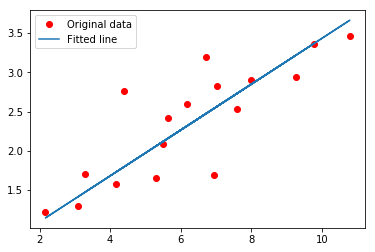

Testing... (Mean square loss Comparison)
Testing cost= 0.0757322
Absolute mean square loss difference: 0.00633085


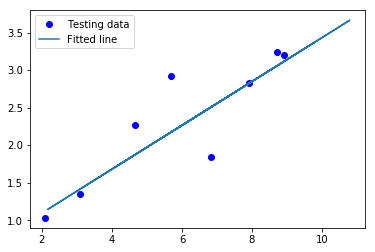

In [133]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)
    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
        "W=", sess.run(W), "b=", sess.run(b))
    # Fit all training data
    for epoch in range(training_epochs):
#         for (x, y) in zip(train_X, train_Y):
#             sess.run(optimizer, feed_dict={X: x, Y: y})
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


boston = load_boston()

data = boston.data
label = boston.target

# normalized data
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)

M = boston.data.shape[0]


Y = tf.placeholder(tf.float32, name='Y')
X = tf.placeholder(tf.float32, [1, 13], name='X')

W = tf.Variable(tf.random_normal([13, 1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.add(tf.matmul(X, W), b)

loss = tf.reduce_sum(tf.square(hypothesis - Y)) / (2. * (M - 1))

optimizer = tf.train.GradientDescentOptimizer(0.01)

train_op = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    for i in range(0, 500):
        for l in range(M):
            _, loss_val, hypo = sess.run(
                [train_op, loss, hypothesis],
                feed_dict={X: data[l, :].reshape([1, 13]),
                           Y: label[l]})
        if (i + 1) % 50 == 0:
            print("Ran " + str(i) + "times\nW=" + \
                str(sess.run(W)) + "\nb=" + str(sess.run(b)))

    print("Done!\n")
    print("Running test...\n")
    t = sess.run(
        loss, feed_dict={X: data[50].reshape([1, 13]),
                         Y: label[50]})
    print("loss =" + str(t))
    print("Real value Y: " + str(label[50]))
    print("Pred Y: " + str(sess.run(hypothesis,
                                    feed_dict={X: data[50].reshape([1, 13])})))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Ran 49times
W=[[-0.41234806]
 [ 0.84875554]
 [ 0.72421205]
 [-0.13422124]
 [-0.22062373]
 [ 0.89979678]
 [-1.05786848]
 [ 0.10187266]
 [-0.65967542]
 [-1.63823366]
 [-0.40075183]
 [ 0.15633889]
 [-1.97006929]]
b=[ 8.53464222]
Ran 99times
W=[[-0.41290101]
 [ 0.79609215]
 [ 0.6384666 ]
 [ 0.3982082 ]
 [-0.10962778]
 [ 2.01994848]
 [-0.74820113]
 [-0.54829645]
 [-0.243276  ]
 [-1.4715097 ]
 [-0.95805013]
 [ 0.35740408]
 [-2.65664744]]
b=[ 14.04894829]
Ran 149times
W=[[-0.41177493]
 [ 0.763017  ]
 [ 0.54649603]
 [ 0.63333941]
 [-0.1290236 ]
 [ 2.61214805]
 [-0.57119387]
 [-0.97016823]
 [ 0.07765383]
 [-1.34974039]
 [-1.24583387]
 [ 0.50610209]
 [-3.05040288]]
b=[ 17.39001465]
Ran 199times
W=[[-0.42063722]
 [ 0.7449193 ]
 [ 0.45478287]
 [ 0.72926003]
 [-0.21221751]
 [ 2.91858697]
 [-0.4662112 ]
 [-1.26163721]
 [ 0.32524499]
 [-1.26844418]
 [-1.40478086]
 [ 0.61772925]
 [-3.28319359]]
b=[ 19.41457176]
Ran 249times
W=[[

In [144]:
foo=[[1,2,3],[4,5,6]]
foo -= np.mean(foo, axis=0)
print(foo)

print(np.std(foo, axis=0))

foo /= np.std(foo, axis=0)
print(foo)


[[-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]]
[ 1.5  1.5  1.5]
[[-1. -1. -1.]
 [ 1.  1.  1.]]
